In [10]:
import numpy as np
from lmfit import *
import openpyxl as xl
import matplotlib.pyplot as plt

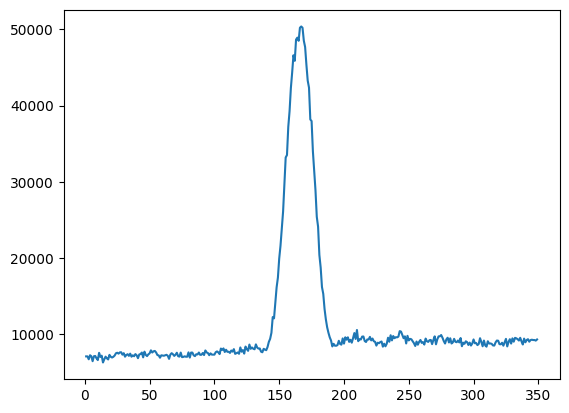

In [11]:
wb = xl.load_workbook(r'D:\confocal_pl_locating\wxd_20221216_50s\upper_point_vertical.xlsx')
sheet = wb['upper_point_vertical']
pix = []
for col in range(3, sheet.max_column+1):
    cell = sheet.cell(1,col)
    pix.append(cell.value)
intensity = []
for col in range(3, sheet.max_column+1):
    cell = sheet.cell(3,col)
    intensity.append(cell.value)

plt.plot(pix, intensity)
plt.show()

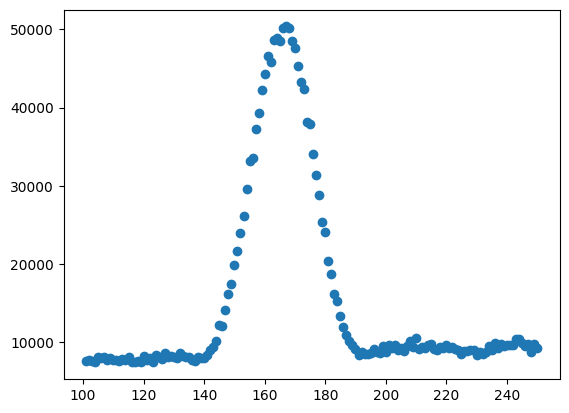

In [12]:
x_data = pix[100:250]
y_data = intensity[100:250]

plt.scatter(x_data,y_data)
plt.show()

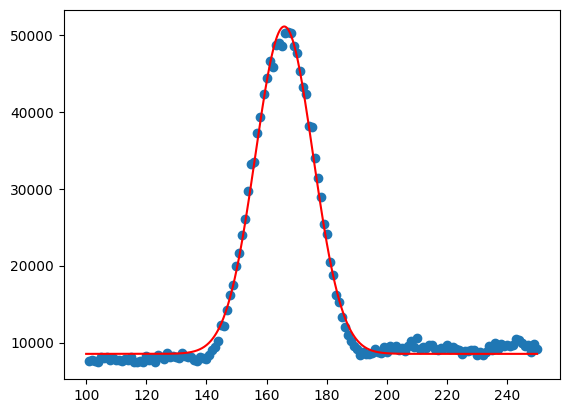

In [13]:
def gaussian(x,a):
    g = a[0]/(a[1]*np.sqrt(np.pi/(4*np.log(2))))*np.exp(-4*np.log(2)*(x-a[2])**2/a[1]**2)+a[3]
    return g
params = Parameters()
params.add('a1', value = 800000)
params.add('a2', value = 20)
params.add('a3', value = 175)
params.add('a4', value = 10000)

def get_residual(params, x, data):
    a1 = params['a1'].value
    a2 = params['a2'].value
    a3 = params['a3'].value
    a4 = params['a4'].value

    model = a1/(a2*np.sqrt(np.pi/(4*np.log(2))))*np.exp(-4*np.log(2)*(x-a3)**2/a2**2)+a4
    return model - data

out = minimize(get_residual, params, args = (x_data, y_data))
a = [0,0,0,0]
a[0] = out.params['a1'].value
a[1] = out.params['a2'].value
a[2] = out.params['a3'].value
a[3] = out.params['a4'].value

x = np.linspace(100,250,1000)
y = gaussian(x,a)
plt.scatter(x_data,y_data)
plt.plot(x,y,'r')
plt.show()

In [14]:
out

In [15]:
error_px = out.params['a3'].stderr
print(error_px)
error_nm = 4.6*error_px
error_nm

0.07452782819706709


0.34282800970650856